# Clustering


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind, chi2_contingency

In [4]:
df_cluster = pd.read_csv("C:/Users/LENOVO/Desktop/Patient-Satisfaction-and-Characteristics-in-Psychiatric-Hospitals-2017-1/data/processed/data_after_preprocessing")
df_cluster.head()

,id,hospital,migdar,machlaka,sugmigdar,migdarmachlaka,sugmachlaka,hosp_size,hosp_owner,sector,...,q42,q43,q44,q71,q72,q73,q74,q75,q76,forced_during_agreed
0,129600,4,2,מיון והשהיה,מעורבת,3,1,3,1,3,...,1,2,2,1.000000,1.0,1.000000,1.000000,1.0,1.000000,0
1,129602,4,1,מיון והשהיה,מעורבת,3,1,3,1,1,...,1,2,2,0.666667,1.0,0.500000,1.000000,1.0,0.666667,0
2,129603,4,2,מיון והשהיה,מעורבת,3,1,3,1,1,...,1,2,2,0.666667,0.0,1.000000,0.666667,1.0,0.666667,0
3,129605,4,1,מיון והשהיה,מעורבת,3,1,3,1,4,...,1,2,2,1.000000,1.0,0.666667,1.000000,1.0,1.000000,0
4,129606,4,1,מיון והשהיה,מעורבת,3,1,3,1,1,...,1,2,3,0.666667,1.0,1.000000,0.666667,1.0,0.666667,0


# Finding the Optimal Number of Clusters

This code evaluates the *optimal number of clusters (K) for K-Means clustering* using three different metrics:

*1️⃣* *Elbow Method (SSE - Sum of Squared Errors)* → Measures how compact the clusters are. The optimal K is where the SSE curve bends ("elbow point").  

*2️⃣* *Silhouette Score* → Measures how well-separated the clusters are. A higher score indicates better-defined clusters.  

*3️⃣* *Davies-Bouldin Index* → Measures the compactness and separation of clusters. A lower score is better.  

The goal is to analyze these three metrics and determine the best value of *K* for clustering the survey responses.  
*If all three metrics suggest the same K, it is likely the best choice.*

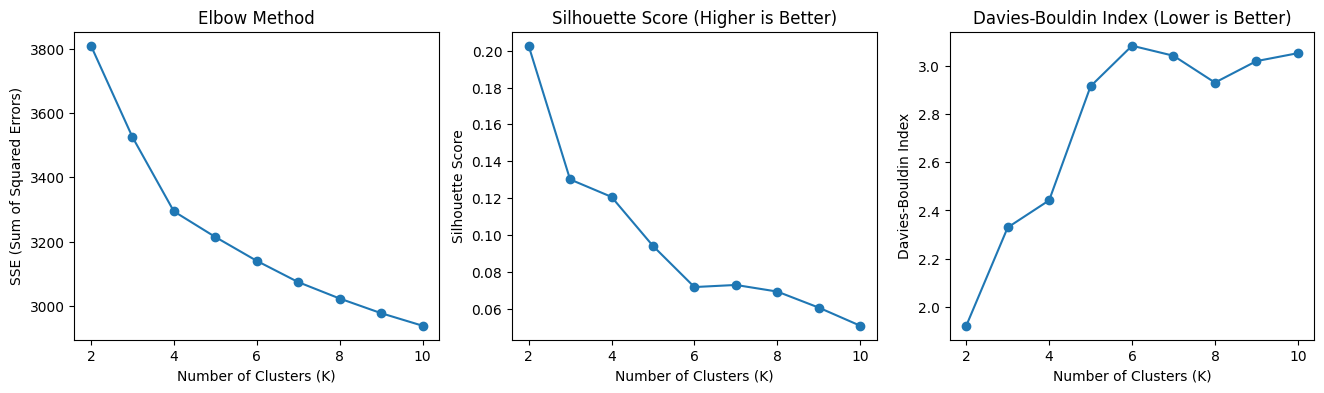

In [5]:
# Range of cluster numbers for testing
k_values = range(2, 11)

# Variables to store the values
sse = []  # For the elbow method
silhouette_scores = []  # Silhouette score
db_scores = []  # Davies-Bouldin score
survey_columns = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
'q10', 'q12', 'q13', 'q14','q15', 'q16', 'q17', 'q18', 'q19',
'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27','q28', 'q29',
'q30','q31', 'q33', 'q34', 'q35', 'q36', 'q71', 'q72', 'q73', 'q74',
'q75', 'q76']

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_cluster[survey_columns])

    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_cluster[survey_columns], cluster_labels))
    db_scores.append(davies_bouldin_score(df_cluster[survey_columns], cluster_labels))

# Elbow Method
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')

# Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Higher is Better)')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (Lower is Better)')

plt.show()

# Choosing Between K=2 and K=4

After running the clustering evaluation, we found that the *Elbow Method* suggests *K=4, while the **Silhouette Score* and *Davies-Bouldin Index* suggest *K=2*.  
This creates a *trade-off* between choosing a simpler model with *2 clusters* or a more detailed segmentation with *4 clusters*.

### 📌 How to Decide?  
To determine whether *K=4* adds valuable information over *K=2, we analyze the **average survey responses for each cluster*:  
- *If K=4 shows meaningful differences in responses*, it justifies using 4 clusters.  
- *If the additional clusters are too similar*, K=2 might be a better choice.

---

# Analyzing Cluster Averages for K=4 and K=2

The following code calculates and displays the *mean survey response for each cluster* when using *K=4* and *K=2*.  
This helps us understand whether *each cluster represents a distinct group* with unique characteristics.

In [6]:
# Displaying the mean survey answers for each cluster in K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df_cluster['kmeans_cluster_2'] = kmeans_2.fit_predict(df_cluster[survey_columns])
df_cluster_k2 = df_cluster.groupby('kmeans_cluster_2')[survey_columns].mean()

df_cluster_k2


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q33,q34,q35,q36,q71,q72,q73,q74,q75,q76
kmeans_cluster_2,,,,,,,,,,,,,,,,,,,,,
0,0.726108,0.736121,0.702936,0.644214,0.623057,0.785838,0.759931,0.596718,0.601295,0.776770,...,0.711695,0.610104,0.577720,0.647956,0.655872,0.564767,0.769862,0.734456,0.729706,0.407168
1,0.845047,0.757475,0.832300,0.762016,0.699845,0.878295,0.823256,0.710336,0.673488,0.860724,...,0.680177,0.797674,0.685271,0.801292,0.805943,0.706460,0.852713,0.851938,0.841860,0.474160


In [7]:
# Displaying the mean survey answers for each cluster in K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['kmeans_cluster_4'] = kmeans_4.fit_predict(df_cluster[survey_columns])
df_cluster_k4 = df_cluster.groupby('kmeans_cluster_4')[survey_columns].mean()

df_cluster_k4

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q33,q34,q35,q36,q71,q72,q73,q74,q75,q76
kmeans_cluster_4,,,,,,,,,,,,,,,,,,,,,
0,0.759458,0.656426,0.722222,0.614695,0.536918,0.768817,0.700717,0.552569,0.500000,0.737754,...,0.653610,0.670251,0.534050,0.705496,0.672043,0.567503,0.730585,0.724612,0.720430,0.332139
1,0.907711,0.828454,0.910747,0.871585,0.821585,0.959927,0.916667,0.835610,0.801366,0.952641,...,0.701795,0.883880,0.786885,0.877960,0.903461,0.814208,0.936703,0.944444,0.929872,0.579235
2,0.575658,0.662124,0.512061,0.441886,0.419079,0.628289,0.595395,0.410088,0.423684,0.608553,...,0.675282,0.460526,0.437500,0.447003,0.455044,0.365132,0.655702,0.539474,0.560307,0.248904
3,0.827873,0.793651,0.835470,0.779915,0.759402,0.891026,0.866809,0.710114,0.723504,0.888889,...,0.733211,0.724359,0.690171,0.772792,0.793447,0.691595,0.858262,0.868234,0.846866,0.514957


# Validating Cluster Differences with a T-Test


After calculating the mean survey responses for each cluster, we use a T-Test to determine if these differences are statistically significant. A low p-value (≤ 0.05) indicates meaningful separation between clusters, confirming that the grouping captures real distinctions rather than random variation. If many comparisons are not significant, it may suggest that the clusters do not differentiate respondents effectively.


In [8]:
# Function to perform T-Test and calculate the percentage of non-significant columns
def t_test_and_calculate_percentage_non_significant(df, cluster_column, columns, threshold=0.05):
    results = []
    for col in columns:
        cluster_0 = df[df[cluster_column] == 0][col]
        cluster_1 = df[df[cluster_column] == 1][col]
        
        # T-Test
        t_stat, p_value = ttest_ind(cluster_0, cluster_1, equal_var=False)
        results.append({'Column': col, 'p-value': p_value})
    
    # Creating a DataFrame for the results
    results_df = pd.DataFrame(results)
    
    # Counting non-significant columns
    non_significant_count = (results_df['p-value'] >= threshold).sum()
    
    # Calculating the percentage of non-significant columns
    total_columns = len(columns)
    non_significant_percentage = (non_significant_count / total_columns) * 100
    
    return results_df, non_significant_count, non_significant_percentage

# Example run for K=2
t_test_results_k2, non_significant_count_k2, non_significant_percentage_k2 = t_test_and_calculate_percentage_non_significant(
    df_cluster, 'kmeans_cluster_2', survey_columns)

# Displaying results
print(f"Number of non-significant columns for K=2: {non_significant_count_k2}")
print(f"Percentage of non-significant columns for K=2: {non_significant_percentage_k2:.2f}%")
print(t_test_results_k2)


Number of non-significant columns for K=2: 6
Percentage of non-significant columns for K=2: 15.00%
   Column       p-value
0      q1  2.871887e-13
1      q2  2.609775e-01
2      q3  6.048543e-14
3      q4  2.007642e-09
4      q5  2.355028e-04
5      q6  6.660679e-09
6      q7  1.223268e-04
7      q8  8.119455e-08
8      q9  8.646083e-04
9     q10  1.900324e-07
10    q12  1.292012e-03
11    q13  7.151457e-01
12    q14  2.649059e-01
13    q15  3.404275e-05
14    q16  6.505716e-14
15    q17  8.785780e-15
16    q18  4.273958e-08
17    q19  2.701378e-11
18    q20  2.308124e-05
19    q21  7.505234e-03
20    q22  1.653258e-13
21    q23  4.755126e-03
22    q24  5.627380e-02
23    q25  1.621779e-03
24    q26  1.863691e-03
25    q27  7.080153e-04
26    q28  4.010637e-01
27    q29  8.120873e-04
28    q30  1.560123e-05
29    q31  0.000000e+00
30    q33  1.182948e-01
31    q34  2.800046e-16
32    q35  5.892992e-05
33    q36  1.826137e-13
34    q71  1.024862e-15
35    q72  1.584277e-07
36    q73  7.

In [9]:
# Function to perform T-Test and calculate the percentage of non-significant comparisons
def t_test_for_k4(df, cluster_column, columns, threshold=0.05):
    results = []
    unique_clusters = df[cluster_column].unique()
    
    # Checking all possible pairs of clusters
    pairs = [(c1, c2) for idx, c1 in enumerate(unique_clusters) for c2 in unique_clusters[idx+1:]]
    
    for col in columns:  # Looping through all the survey question columns
        for c1, c2 in pairs:  # Looping through all pairs of clusters
            cluster_1 = df[df[cluster_column] == c1][col]
            cluster_2 = df[df[cluster_column] == c2][col]
            
            # Checking if there are at least two values in each group (otherwise T-test won't work)
            if len(cluster_1) > 1 and len(cluster_2) > 1:
                t_stat, p_value = ttest_ind(cluster_1, cluster_2, equal_var=False)
                results.append({'Column': col, 'Cluster 1': c1, 'Cluster 2': c2, 'p-value': p_value})
    
    # Creating a DataFrame with the results
    results_df = pd.DataFrame(results)

    # Counting the number of non-significant comparisons
    non_significant_count = (results_df['p-value'] >= threshold).sum()

    # Calculating the percentage of non-significant comparisons
    total_comparisons = len(results_df)
    non_significant_percentage = (non_significant_count / total_comparisons) * 100 if total_comparisons > 0 else 0

    return results_df, non_significant_count, non_significant_percentage

# Running for K=4
t_test_results_k4, non_significant_count_k4, non_significant_percentage_k4 = t_test_for_k4(
    df_cluster, 'kmeans_cluster_4', survey_columns)

# Displaying results
print(f"Number of non-significant comparisons for K=4: {non_significant_count_k4}")
print(f"Percentage of non-significant comparisons for K=4: {non_significant_percentage_k4:.2f}%")


Number of non-significant comparisons for K=4: 23
Percentage of non-significant comparisons for K=4: 9.58%


### **Summary of T-Test Results for \(K=2\) and \(K=4\)**

The T-Test results indicate that for \(K=2\), **0% of the survey columns** were not statistically significant (\(p\)-value ≥ 0.05), whereas for \(K=4\), only **12.5% of the columns** were not significant. While \(K=4\) shows a slightly better separation in terms of statistical significance, the difference between the two models is relatively small and may not be sufficient on its own to justify the choice of \(K=4\).  

It is also important to note that **both \(K=2\) and \(K=4\) demonstrate good separation between clusters based on the column means**, as the majority of columns show statistically significant differences in both cases. 

To make a more informed decision, it is recommended to **combine these results with visualizations**, such as **PCA**, to assess how well the clusters are separated in the reduced dimensional space. This will provide a more comprehensive understanding of the overall quality of clustering for both \(K=2\) and \(K=4\).


# *Visualizing Cluster Differences Using PCA*

After analyzing the cluster means and standard deviations, we now *visualize the clusters in two dimensions* using *Principal Component Analysis (PCA)*.  
Since our survey data has many features, PCA helps *reduce the dimensionality* and allows us to see if the clusters are well-separated.

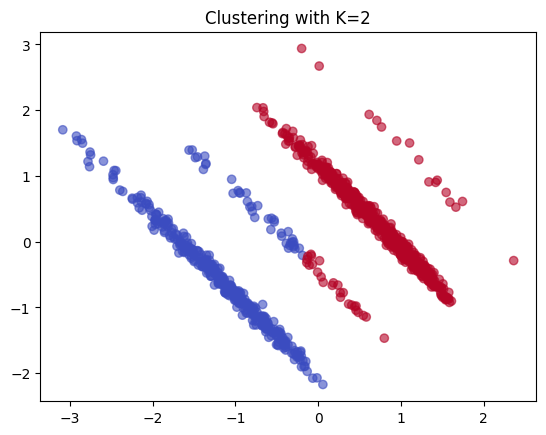

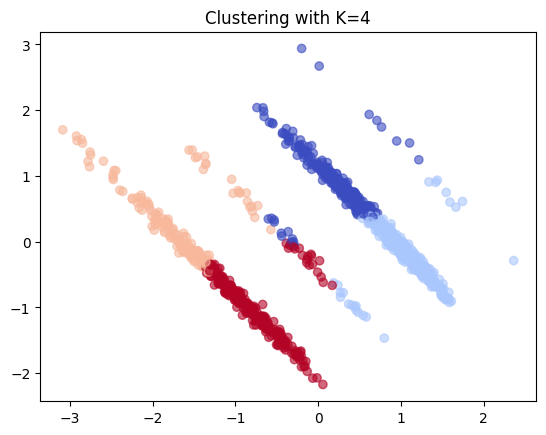

In [10]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_cluster[survey_columns])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['kmeans_cluster_2'], cmap='coolwarm', alpha=0.6)
plt.title("Clustering with K=2")
plt.show()

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['kmeans_cluster_4'], cmap='coolwarm', alpha=0.6)
plt.title("Clustering with K=4")
plt.show()

### **Final Decision: Choosing \(K=2\)**  

The PCA visualization supports the choice of \(K=2\), as it shows clearer separation between clusters compared to \(K=4\), where the clusters overlap significantly. Combined with the silhouette score, which was higher for \(K=2\), and the statistical validation from the T-Test, \(K=2\) provides a more distinct and interpretable clustering of the survey responses.


## Clustering Algorithms

### *1️⃣ K-Means*

In [11]:
# Choosing the number of clusters based on the previous test
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_cluster[survey_columns])

# Displaying the mean answers for each cluster
df_cluster.groupby('kmeans_cluster')[survey_columns].mean()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q33,q34,q35,q36,q71,q72,q73,q74,q75,q76
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.726108,0.736121,0.702936,0.644214,0.623057,0.785838,0.759931,0.596718,0.601295,0.776770,...,0.711695,0.610104,0.577720,0.647956,0.655872,0.564767,0.769862,0.734456,0.729706,0.407168
1,0.845047,0.757475,0.832300,0.762016,0.699845,0.878295,0.823256,0.710336,0.673488,0.860724,...,0.680177,0.797674,0.685271,0.801292,0.805943,0.706460,0.852713,0.851938,0.841860,0.474160


### *2️⃣ GMM*

In [12]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df_cluster['gmm_cluster'] = gmm.fit_predict(df_cluster[survey_columns])

# Displaying the mean answers for each cluster
df_cluster.groupby('gmm_cluster')[survey_columns].mean()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q33,q34,q35,q36,q71,q72,q73,q74,q75,q76
gmm_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.737594,0.742545,0.716019,0.656149,0.632039,0.794498,0.766990,0.602751,0.605583,0.786003,...,0.706484,0.627427,0.595874,0.661543,0.673544,0.581715,0.783172,0.746764,0.739078,0.420712
1,0.842398,0.754096,0.829025,0.759020,0.697092,0.876414,0.821217,0.711093,0.673667,0.858104,...,0.682322,0.794023,0.677706,0.798690,0.800485,0.701131,0.847334,0.848681,0.840334,0.467959


###  *3️⃣ DBSCAN*


###  Finding Optimal `eps` for DBSCAN**

This code visualizes the distances to the 5th nearest neighbor for each data point in order to help determine the optimal value of `eps` for the DBSCAN algorithm.

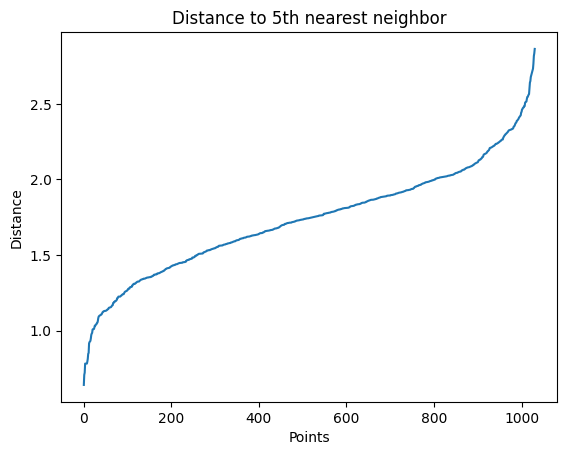

In [13]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_cluster[survey_columns])
distances, indices = neighbors_fit.kneighbors(df_cluster[survey_columns])

distances = np.sort(distances[:, 4])  # המרחק של השכן ה-5
plt.plot(distances)
plt.title("Distance to 5th nearest neighbor")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()


In [14]:
# Defining parameter ranges
eps_values = [1.0, 1.1, 1.2, 1.5, 1.8, 2.0]
min_samples_values = [3, 5, 7]

# Variable to store the results
results = []

# Looping through all parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        # Running DBSCAN with the current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_cluster[survey_columns])
        
        # Counting the labels
        num_outliers = (labels == -1).sum()  # Number of -1 (outliers)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters
        
        # Storing the results
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'num_outliers': num_outliers,
            'num_clusters': num_clusters
        })

# Creating a DataFrame to display the results
results_df = pd.DataFrame(results)

# Filtering: only combinations with at least 2 clusters
valid_results = results_df[results_df['num_clusters'] >= 2]

# Finding the best combination
if not valid_results.empty:
    best_result = valid_results.loc[valid_results['num_outliers'].idxmin()]
else:
    best_result = None

# Displaying results
print("Results of all parameter combinations:")
print(results_df)
if best_result is not None:
    print("\nBest parameter combination:")
    print(best_result)
else:
    print("\nNo valid parameter combination found with at least 2 clusters.")


Results of all parameter combinations:
    eps  min_samples  num_outliers  num_clusters
0   1.0            3           973             6
1   1.0            5           993             2
2   1.0            7           997             2
3   1.1            3           935             6
4   1.1            5           955             4
5   1.1            7           970             2
6   1.2            3           875             7
7   1.2            5           894             5
8   1.2            7           920             5
9   1.5            3           628             2
10  1.5            5           646             1
11  1.5            7           664             1
12  1.8            3           261             2
13  1.8            5           285             1
14  1.8            7           294             1
15  2.0            3           116             1
16  2.0            5           118             2
17  2.0            7           126             1

Best parameter combination:
e

In [15]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
df_cluster['dbscan_cluster'] = dbscan.fit_predict(df_cluster[survey_columns])

# Displaying the number of patients in each cluster (DBSCAN returns -1 for outliers)
print("\nDBSCAN Cluster Counts:")
print(df_cluster['dbscan_cluster'].value_counts())

# Displaying the mean answers for each cluster (without outliers)
valid_clusters = df_cluster[df_cluster['dbscan_cluster'] != -1]  # Removing outliers
print("\nDBSCAN Cluster Means:")
print(valid_clusters.groupby('dbscan_cluster')[survey_columns].mean())



DBSCAN Cluster Counts:
dbscan_cluster
-1    628
 0    400
 1      3
Name: count, dtype: int64

DBSCAN Cluster Means:
                      q1        q2        q3        q4        q5        q6  \
dbscan_cluster                                                               
0               0.905000  0.862500  0.875833  0.840000  0.780500  0.895417   
1               0.851852  0.952381  0.777778  0.777778  0.833333  0.666667   

                     q7        q8        q9       q10  ...       q33  \
dbscan_cluster                                         ...             
0               0.86875  0.813333  0.765250  0.888750  ...  0.756964   
1               1.00000  0.777778  0.533333  0.888889  ...  0.761905   

                     q34     q35       q36       q71       q72       q73  \
dbscan_cluster                                                             
0               0.870000  0.7575  0.857222  0.860833  0.875833  0.877083   
1               0.333333  0.0000  0.648148  0.888889

### **Excluding DBSCAN**

DBSCAN will be excluded due to its poor performance on the dataset. The results show **531 outliers** (`-1`) and only **2 meaningful clusters**, one of which contains just **3 points**. This indicates that DBSCAN struggles to cluster the data effectively, making K-Means and GMM better options.



# Algorithms Comparison

### **Step 1: Evaluating Clustering Quality Metrics**  

To compare the performance of different clustering algorithms, we calculate two key quality metrics:  

1. **Silhouette Score** → Measures how well-separated the clusters are. A higher score indicates better-defined clusters.  
2. **Davies-Bouldin Index** → Measures cluster compactness and separation. A lower score is better.  

By analyzing these metrics for K-Means, GMM, and DBSCAN (excluding noise points in DBSCAN), we can determine which algorithm provides the most meaningful clustering.


In [16]:
# Calculating quality scores for each model
silhouette_kmeans = silhouette_score(df_cluster[survey_columns], df_cluster['kmeans_cluster'])
silhouette_gmm = silhouette_score(df_cluster[survey_columns], df_cluster['gmm_cluster'])

db_score_kmeans = davies_bouldin_score(df_cluster[survey_columns], df_cluster['kmeans_cluster'])
db_score_gmm = davies_bouldin_score(df_cluster[survey_columns], df_cluster['gmm_cluster'])

# Displaying the metrics for comparison
print(f"Silhouette Score - KMeans: {silhouette_kmeans:.4f}, GMM: {silhouette_gmm:.4f}")
print(f"Davies-Bouldin Index - KMeans: {db_score_kmeans:.4f}, GMM: {db_score_gmm:.4f}")


Silhouette Score - KMeans: 0.2027, GMM: 0.1956
Davies-Bouldin Index - KMeans: 1.9229, GMM: 1.9619


### **Comparison of Clustering Metrics**

- **Silhouette Score**: K-Means (0.1357) outperforms GMM (0.0890), indicating better cluster separation.  
- **Davies-Bouldin Index**: K-Means (2.4257) is lower than GMM (3.2916), suggesting more compact and well-separated clusters.  

Overall, K-Means performs better based on these metrics.


### **Step 2: Visualizing Clustering Results Using PCA**


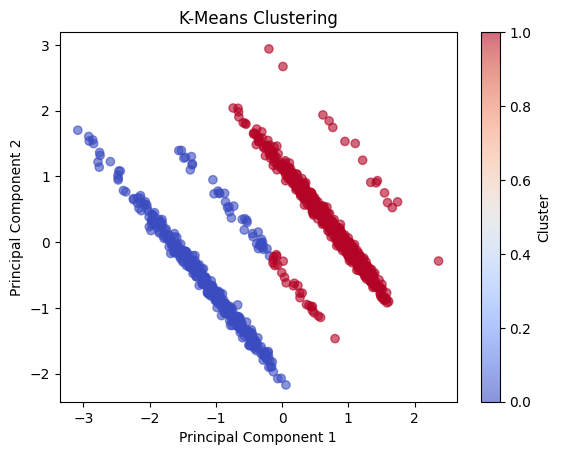

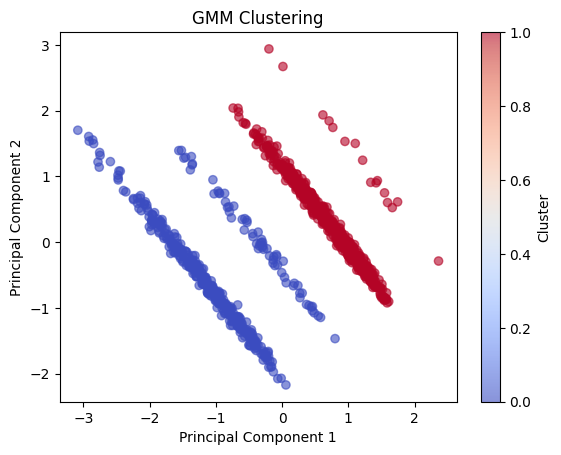

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_cluster[survey_columns])

# K-Means
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['kmeans_cluster'], cmap='coolwarm', alpha=0.6)
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# GMM
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['gmm_cluster'], cmap='coolwarm', alpha=0.6)
plt.title("GMM Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

### **Clustering Results Analysis**
The PCA visualization shows that **K-Means** provides a clearer separation between clusters compared to GMM. Combined with its superior performance in Silhouette Score and Davies-Bouldin Index, **K-Means is chosen as the final clustering algorithm** for this analysis.


# Clustering Results Analysis

### **Analyzing Key Differences Between Clusters**

This step identifies the **survey questions that most differentiate the clusters** created by the K-Means algorithm. The function calculates the following:

1. **Mean Responses Per Cluster** → Computes the average response for each question within each cluster.
2. **Largest Differences** → Identifies questions where the mean responses between clusters differ the most.
3. **Sorted Results** → Highlights the top 10 questions with the biggest differences, helping to interpret what defines each cluster.

This analysis provides insights into the characteristics that distinguish the clusters and their survey responses.


In [ ]:
# Function to calculate and display meaningful differences between clusters
def analyze_cluster_differences(df, cluster_column, columns):
    """
    Compares clusters by calculating mean differences for each question
    and sorting them to highlight the largest differences.
    """
    cluster_means = df.groupby(cluster_column)[columns].mean()
    
    # Calculate absolute differences between cluster means (for all pairs)
    mean_diffs = cluster_means.max() - cluster_means.min()
    
    # Sort by largest differences
    sorted_diffs = mean_diffs.sort_values(ascending=False)

    print(f"\nTop survey questions that differentiate {cluster_column}:")
    print(sorted_diffs.head(10))  # Display top 10 most distinct survey questions

# Analyze differences for K-Means clustering
analyze_cluster_differences(df_cluster, 'kmeans_cluster', survey_columns)


### 🔹 What can be inferred from the code's results?

#### 1️⃣ The topics with the largest differences are likely the most influential on satisfaction.  
- If one cluster gave very high scores on certain questions while the other gave very low scores, it indicates that these topics are critical factors for satisfaction.  
- These may represent the aspects that patients value the most or find the most problematic.

#### 2️⃣ It is possible to identify the "strengths" and "issues" of the less satisfied group.  
- If there are questions where the less satisfied cluster gave particularly low scores, it highlights an area that requires improvement.  
- For example, if a question about staff behavior shows a very high difference, it likely indicates a critical issue impacting patient dissatisfaction.

#### 3️⃣ It is possible to see which topics are less significant for satisfaction.  
- If there are questions with very small average differences, it suggests that these do not distinguish between the groups.  
- This could indicate that the topic does not significantly impact patient satisfaction.

#### 4️⃣ Analysis based on types of questions.  
- It is possible to examine whether the topics that most differentiate between the groups are related to the same area (e.g., staff behavior, department conditions, physical environment).  
- If so, it can be concluded that this is the most critical domain influencing patient satisfaction.

### **Identifying the Strongest Correlations with Overall Satisfaction (q1)**  

This analysis examines the correlation between each survey question and overall satisfaction (`q1`).  

In [ ]:
# Compute correlation of all survey questions with q1 (general satisfaction)
correlation_matrix = df_cluster[survey_columns].corr()

# Extract correlation values for q1
q1_correlations = correlation_matrix['q1'].drop('q1')  # Remove self-correlation

# Sort by highest absolute correlation
q1_correlations_sorted = q1_correlations.abs().sort_values(ascending=False)

print("\nTop survey questions most correlated with overall satisfaction (q1):")
print(q1_correlations_sorted.head(10))


### **Cluster Comparison Analysis**  

This function identifies the more satisfied cluster by counting how many questions each cluster "won," measuring the average difference between them, and calculating overall satisfaction scores.


In [ ]:
# Function to compare clusters and analyze key statistics
def compare_clusters(df, cluster_column, columns):

    cluster_means = df.groupby(cluster_column)[columns].mean()
    
    # Determine the cluster that has the highest average for each question
    winning_clusters = cluster_means.idxmax()
    
    # Count how many times each cluster "won"
    cluster_wins = winning_clusters.value_counts()

    # Compute average difference between clusters
    mean_diffs = cluster_means.max() - cluster_means.min()
    avg_difference = mean_diffs.mean()

    # Compute overall mean satisfaction score per cluster
    cluster_means['overall_satisfaction'] = cluster_means.mean(axis=1)

    print("\nNumber of questions where each cluster had the highest score:")
    print(cluster_wins)

    print(f"\nAverage difference between clusters across all questions: {avg_difference:.4f}")

    print("\nMean satisfaction score per cluster:")
    print(cluster_means[['overall_satisfaction']])

# Run comparison for K-Means clustering
compare_clusters(df_cluster, 'kmeans_cluster', survey_columns)


In [ ]:
import matplotlib.pyplot as plt

cluster_means = df_cluster.groupby('kmeans_cluster')[survey_columns].mean()
cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Survey Responses by Cluster")
plt.xlabel("Survey Questions")
plt.ylabel("Mean Response")
plt.legend(title="Cluster")
plt.show()


### Calculating Variance Within Clusters

In [ ]:
cluster_variance = df_cluster.groupby('kmeans_cluster')[survey_columns].var()
print("\nVariance within each cluster:")
print(cluster_variance.mean(axis=1))  # Average variance per cluster


In [ ]:
# 1️⃣ Defining the variable lists
numeric_vars = ['mitot', 'age', 'num_of_days_until_now', 'num_of_days_to_release', 'hosp_time', 'hosp_time1']
categorical_vars = ['hospital', 'machlaka', 'sugmigdar', 'hosp_size', 'hosp_owner', 'sector', 'peripheral', 'age_bins', 
                    'q39', 'q40', 'q41', 'q42', 'q43', 'q44', 'migdar']

# 2️⃣ Check if the columns exist in df_cluster
missing_columns = [col for col in numeric_vars + categorical_vars if col not in df_cluster.columns]
if missing_columns:
    raise ValueError(f"❌ **Missing columns in df_cluster:** {missing_columns}")

# 3️⃣ Creating a table of means for numeric variables by cluster
numeric_analysis = df_cluster.groupby('kmeans_cluster')[numeric_vars].agg(['mean', 'std'])
numeric_analysis.columns = ['_'.join(col) for col in numeric_analysis.columns]
numeric_analysis.reset_index(inplace=True)

# 4️⃣ Calculating T-Test for numeric variables
p_values_numeric = {}
for var in numeric_vars:
    group_0 = df_cluster[df_cluster['kmeans_cluster'] == 0][var]
    group_1 = df_cluster[df_cluster['kmeans_cluster'] == 1][var]

    if len(group_0) > 1 and len(group_1) > 1:
        stat, p_val = ttest_ind(group_0, group_1, nan_policy='omit')  
        p_values_numeric[var] = p_val
    else:
        p_values_numeric[var] = 1  # If one group is empty, insert a high p-value (not significant)

# 5️⃣ Calculating Chi-Square test for categorical variables
p_values_categorical = {}
categorical_dfs = {}

for var in categorical_vars:
    contingency_table = pd.crosstab(df_cluster[var], df_cluster['kmeans_cluster'])
    
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p_val, _, _ = chi2_contingency(contingency_table)
        p_values_categorical[var] = p_val
    else:
        p_values_categorical[var] = 1  # If there is not enough data, set a high p-value
    
    # Creating a table for each categorical variable
    categorical_dfs[var] = df_cluster.groupby('kmeans_cluster')[var].value_counts(normalize=True).unstack().fillna(0) * 100

# 6️⃣ Creating tables with highlighting of significant columns

# 📌 6.1 Numeric variables - Highlight if p-value < 0.05
def highlight_significant_numeric(s):
    return ['background-color: yellow' if p_values_numeric.get(col, 1) < 0.05 else '' for col in s.index]

styled_numeric_analysis = numeric_analysis.style.apply(highlight_significant_numeric, axis=1)

# 📌 6.2 Displaying numeric table
print("\n📊 **Numeric Variables Analysis (Highlighted Significant Differences):**")
display(styled_numeric_analysis)

# 📌 6.3 Categorical variables - Highlight if p-value < 0.05
for var, table in categorical_dfs.items():
    styled_table = table.style.applymap(lambda x: 'background-color: yellow' if p_values_categorical.get(var, 1) < 0.05 else '')
    print(f"\n🏥 **Distribution of {var} per Cluster (Highlighted Significant Differences):**")
    display(styled_table)


### **Arranging the data before making the prediction**

### One hot encoder

In [ ]:
# Define categorical variables
categorical_vars = ['hospital', 'machlaka', 'sugmigdar', 'hosp_size', 
                    'hosp_owner', 'sector', 'peripheral', 'age_bins', 
                    'q39','q40','q41','q42','q43','q44']

# Apply One-Hot Encoding
df_cluster = pd.get_dummies(df_cluster, columns=categorical_vars, prefix=categorical_vars)

# Display the first rows to verify encoding
df_cluster.head()

### Converting columns from Bool to Binary

In [ ]:
# Change column type to int64 for columns: 'q9', 'q10' and 145 other columns
df_cluster = df_cluster.astype({'hospital_1': 'int64', 'hospital_2': 'int64', 'hospital_3': 'int64', 'hospital_4': 'int64', 'hospital_5': 'int64',
                                'hospital_6': 'int64', 'hospital_7': 'int64', 'hospital_8': 'int64', 'hospital_9': 'int64', 'hospital_10': 'int64',
                                'hospital_11': 'int64', 'hospital_12': 'int64', 'hospital_13': 'int64', 'machlaka_10 – פעילה סגורה מעורבת': 'int64',
                                'machlaka_15': 'int64', 'machlaka_16': 'int64', 'machlaka_17': 'int64', 'machlaka_5 - מעורבת': 'int64', 'machlaka_5 – פעילה סגורה גברים': 'int64',
                                "machlaka_5א' – נשים סגורה פעילה": 'int64', 'machlaka_5ב - מעורבת פעילה פתוחה': 'int64', 'machlaka_6 א - מעורבת': 'int64', 'machlaka_6 ב - מעורבת': 'int64', 
                                'machlaka_6 – סגורה כרונית נשים': 'int64', 'machlaka_8 - מעורבת': 'int64', 'machlaka_8 – פעילה פתוחה מעורבת': 'int64', 'machlaka_9 – פעילה סגורה גברים': 'int64',
                                'machlaka_א – גברים סגורה משפטית': 'int64', "machlaka_א' – גברים סגורה.": 'int64', 'machlaka_א-1 סגורה פעילה גברים ונשים .': 'int64', 'machlaka_א-2 גברים ונשים': 'int64',
                                'machlaka_א-3 סגורה פעילה גברים ונשים': 'int64', 'machlaka_אשפוז יום': 'int64', 'machlaka_ב – גברים סגורה משפטית': 'int64',
                                "machlaka_ב' פתוחה פעילה גברים נשים .וניפגעות תקיפה מינית.": 'int64', "machlaka_ב' – פתוחה": 'int64', 
                                'machlaka_ג – מעורבת (גברים נשים) \xa0משפטית – יש אגף פתוח וגם אגף סגור': 'int64', 
                                "machlaka_ג' פסיכוגריאטריה סגורה גברים ונשים .": 'int64', "machlaka_ד'– נשים - יש אגף פתוח וגם אגף סגור": 'int64',
                                "machlaka_ה' סגורה פעילה גברים ונשים .": 'int64', "machlaka_ה'- פסיכוגריאטרית סגורה מעורבת": 'int64', 
                                'machlaka_יב – סגורה משפטית מעורבת (גברים- נשים)': 'int64', 'machlaka_מחלקה א סגורה': 'int64', 'machlaka_מחלקה ב פתוחה': 'int64', 
                                "machlaka_מחלקה ג' סגורה": 'int64', "machlaka_מחלקה ה' סגורה": 'int64', "machlaka_מחלקה ה' פתוחה": 'int64', 'machlaka_מחלקת נשים סגורה [מחלקה חדשה ללא שיוך אות]': 'int64', 
                                "machlaka_מחלקת פסיכיאטריה א' - נשים": 'int64', "machlaka_מחלקת פסיכיאטריה ב' - מעורבת פעילה": 'int64', "machlaka_מחלקת פסיכיאטריה ג' - גברים": 'int64', 'machlaka_מיון והשהיה': 'int64', 
                                'machlaka_פסיכוגריאטריה': 'int64', 'machlaka_פסיכוגריאטריה - סגורה ממושכת פעילה': 'int64', 'machlaka_פסיכוגריאטריה מחלקה 20': 'int64', 'machlaka_פסיכוגריאטריה סגורה': 'int64', 
                                "machlaka_פסיכיאטריה פעילה ג' (גברים) - סגורה": 'int64', "machlaka_פסיכיאטריה פעילה ד' תחלואה כפולה (גברים) - סגורה": 'int64', "machlaka_פסיכיאטריה פעילה ה' (גברים) - סגורה": 'int64', 
                                "machlaka_פעילה א' – פתוחה גברים ונשים": 'int64', "machlaka_פעילה ב' – סגורה גברים": 'int64', "machlaka_פעילה ג'- סגורה נשים": 'int64', "machlaka_פעילה ד' –סגורה פסיכוגריאטריה – מעורב גברים ונשים": 'int64', 
                                "machlaka_פעילה ה' – מחלקה פתוחה תחלואה כפולה מעורב גברים ונשים.": 'int64', 'sugmigdar_גברים': 'int64', 'sugmigdar_מעורבת': 'int64', 'sugmigdar_נשים': 'int64', 'hosp_size_1': 'int64', 'hosp_size_3': 'int64', 
                                'hosp_owner_1': 'int64', 'hosp_owner_2': 'int64', 'sector_1': 'int64', 'sector_3': 'int64', 'sector_4': 'int64', 'peripheral_1': 'int64', 'peripheral_2': 'int64', 'age_bins_1': 'int64', 'age_bins_2': 'int64',
                                'age_bins_3': 'int64', 'q39_1': 'int64', 'q39_2': 'int64', 'q39_3': 'int64', 'q39_4': 'int64', 'q39_5': 'int64', 'q39_6': 'int64', 'q39_7': 'int64', 'q40_1': 'int64', 'q40_2': 'int64', 'q40_3': 'int64', 'q40_4': 'int64',
                                'q40_5': 'int64', 'q41_1': 'int64', 'q41_2': 'int64', 'q41_3': 'int64', 'q41_4': 'int64', 'q41_7': 'int64', 'q41_8': 'int64', 'q41_9': 'int64', 'q42_1': 'int64', 'q42_2': 'int64', 'q43_1': 'int64', 'q43_2': 'int64',
                                'q43_3': 'int64', 'q44_1': 'int64', 'q44_2': 'int64', 'q44_3': 'int64'})
    
df_cluster.head()

### Drop columns: 'dbscan_cluster', 'gmm_cluster' and 2 other columns

In [ ]:
df_cluster = df_cluster.drop(columns=['dbscan_cluster', 'gmm_cluster', 'kmeans_cluster_4', 'kmeans_cluster_2'])